# Important Note
This notebook was developed as a midterm project for Professor Mathew Barlow's Environmental Data Analysis using Python course at UMass Lowell during the Spring 2025 semester.

Some of the analysis including the "Double checking graph's values" was added over the summer of 2025.



# Description
This notebook uses GHCND data from AWS to make a histogram of Boston's daily maximum temperature from 1991 to 2020. Through this notebook, the necessary data will be retrieved from AWS, then scraped so only the dates and temperatures remain. With this scraped data, a histogram will be created to visual represent it.

This notebook is based off of Umass Lowell Professor Barlow's "notebook_01_GHCN_daily_AWS_Boston.ipynb", which will be referred to as Noteb0ook #01 from here on out.

# Install packages
Install all the required packages that will be needed for this assignment.

The packages being installed are the same ones as in Professor Barlow's Notebook #01.

In [41]:
!pip install s3fs --quiet
!pip install cartopy --quiet

# Import libraries
Import libraries necessary for this assignment. For this task only three libraries are needed:


1.   s3fs - To help read in data from AWS
2.   pandas - To help organize and "clean" data
3.   matplotlib.pyplot - To represent data in a graph (a histogram in this case)



In [42]:
import s3fs
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve data
This section will retrieve the necessary data similar to the "Read in data from AWS" section from Professor Barlow's Notebook #01.

Set ID for Boston Logan (so only Boston data is retrieved)

In [43]:
boston_id = 'USW00014739'

Set directory from where data is coming from

In [44]:
data_url = 'https://noaa-ghcn-pds.s3.amazonaws.com/csv/by_station/'

Prepare to recieve data from AWS

In [45]:
fs = s3fs.S3FileSystem(anon=True)

Retrieve data with matching ID (in this case, data entries with Boston's ID will be retrieved)

In [46]:
data = pd.read_csv(data_url + boston_id + '.csv', low_memory=False)

Output the data to ensure it has been retrieved

In [47]:
data

,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
0,USW00014739,19360101,TMAX,17,NaN,NaN,0,2400.0
1,USW00014739,19360102,TMAX,17,NaN,NaN,0,2400.0
2,USW00014739,19360103,TMAX,122,NaN,NaN,0,2400.0
3,USW00014739,19360104,TMAX,78,NaN,NaN,0,2400.0
4,USW00014739,19360105,TMAX,61,NaN,NaN,0,2400.0
...,...,...,...,...,...,...,...,...
443947,USW00014739,20250201,WSF5,139,NaN,NaN,W,NaN
443948,USW00014739,20250202,WSF5,98,NaN,NaN,W,NaN
443949,USW00014739,20250203,WSF5,139,NaN,NaN,W,NaN
443950,USW00014739,20250204,WSF5,201,NaN,NaN,W,NaN


Make new index column called 'Time' that is each entries date in year-month-day format

In [48]:
data['Time'] = pd.to_datetime(data['DATE'].astype(str), format='%Y%m%d') # determine time by using date column
data.set_index('Time', inplace=True) # set time column as index
data

,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
Time,,,,,,,,
1936-01-01,USW00014739,19360101,TMAX,17,NaN,NaN,0,2400.0
1936-01-02,USW00014739,19360102,TMAX,17,NaN,NaN,0,2400.0
1936-01-03,USW00014739,19360103,TMAX,122,NaN,NaN,0,2400.0
1936-01-04,USW00014739,19360104,TMAX,78,NaN,NaN,0,2400.0
1936-01-05,USW00014739,19360105,TMAX,61,NaN,NaN,0,2400.0
...,...,...,...,...,...,...,...,...
2025-02-01,USW00014739,20250201,WSF5,139,NaN,NaN,W,NaN
2025-02-02,USW00014739,20250202,WSF5,98,NaN,NaN,W,NaN
2025-02-03,USW00014739,20250203,WSF5,139,NaN,NaN,W,NaN


From the data, create a separate series for TMAX (max temperatures) and slice this data so it's only from 1991 to 2020

In [49]:
TMAX = data[data['ELEMENT'] == 'TMAX']['DATA_VALUE'].asfreq('D') # find all data entries where max temp. is the element
TMAX = TMAX['1991-1-1' : '2020-12-31'] # slice so only data from 1991 to 2020 remains
TMAX

,DATA_VALUE
Time,
1991-01-01,0
1991-01-02,94
1991-01-03,44
1991-01-04,11
1991-01-05,28
...,...
2020-12-27,33
2020-12-28,94
2020-12-29,56


#Plot Histogram
Plotting a histogram to visualize the frequencies of maximum temperatures in Boston from 1991 to 2020

Text(0, 0.5, 'Frequency')

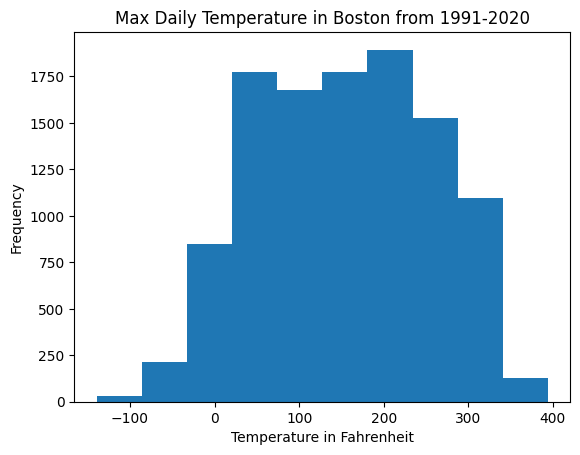

In [50]:
TMAX.plot.hist(title='Max Daily Temperature in Boston from 1991-2020')
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Frequency')

From this graph we can see that most of the maximum daily temperatures in Boston in this time span are between 0 and 300 degrees fahrenheit.

However, this graph illustrates a high number of occurence in temperatures not only above 100 degrees, but above 200. There are close to 1250 occurences of temperatures over 300 with the highest being close to 400. The lowest temperature is also below -100 degrees. Not being a specialist in meteorology, it may be best to double check that the graph's values with those retrieved from AWS, just to ensure no errors occurred in transforming the data into a graph

## Double checking graph's values
Lets take a look at the max temperatures that were retrieved from AWS

In [51]:
data

,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
Time,,,,,,,,
1936-01-01,USW00014739,19360101,TMAX,17,NaN,NaN,0,2400.0
1936-01-02,USW00014739,19360102,TMAX,17,NaN,NaN,0,2400.0
1936-01-03,USW00014739,19360103,TMAX,122,NaN,NaN,0,2400.0
1936-01-04,USW00014739,19360104,TMAX,78,NaN,NaN,0,2400.0
1936-01-05,USW00014739,19360105,TMAX,61,NaN,NaN,0,2400.0
...,...,...,...,...,...,...,...,...
2025-02-01,USW00014739,20250201,WSF5,139,NaN,NaN,W,NaN
2025-02-02,USW00014739,20250202,WSF5,98,NaN,NaN,W,NaN
2025-02-03,USW00014739,20250203,WSF5,139,NaN,NaN,W,NaN


Lets get the maximum temperatures into a separate data frame as it'll make analyzing much easier:

In [52]:
TMAX_df = pd.DataFrame(data[data['ELEMENT'] == 'TMAX']) # only add TMAX entries to new data frame
TMAX_df = TMAX_df['1991-01-01' : '2020-12-31']['DATA_VALUE'] # slice data for correct dates; only have temperature values
TMAX_df

,DATA_VALUE
Time,
1991-01-01,0
1991-01-02,94
1991-01-03,44
1991-01-04,11
1991-01-05,28
...,...
2020-12-27,33
2020-12-28,94
2020-12-29,56


Now lets find all the temperature values that occur at least once in this time span

In [53]:
unique_values = TMAX_df.unique().tolist() # make list of unique temperature values; all values that appear at least once
unique_values.sort() # sort the list
print(unique_values) # show list

[-139, -133, -128, -121, -117, -110, -106, -105, -100, -99, -94, -89, -83, -82, -78, -77, -72, -71, -67, -66, -61, -60, -56, -55, -50, -49, -44, -43, -39, -38, -33, -32, -28, -27, -22, -21, -17, -16, -11, -10, -6, -5, 0, 6, 11, 17, 22, 28, 33, 39, 44, 50, 56, 61, 67, 72, 78, 83, 89, 94, 100, 106, 111, 117, 122, 128, 133, 139, 144, 150, 156, 161, 167, 172, 178, 183, 189, 194, 200, 206, 211, 217, 222, 228, 233, 239, 244, 250, 256, 261, 267, 272, 278, 283, 289, 294, 300, 306, 311, 317, 322, 328, 333, 339, 344, 350, 356, 361, 367, 372, 378, 383, 394]


These temperatures seem to align with those shown by the histogram.


While the list is sorted, lets find the maximum and minimum values.

In [54]:
print("Max temperature was", TMAX_df.max(), "degrees Fahrenheit")
print("Min temperature was", TMAX_df.min(), "degrees Fahrenheit")

Max temperature was 394 degrees Fahrenheit
Min temperature was -139 degrees Fahrenheit


These values match the maximum and minimum values shown by the histogram too! Based on these tests, it is reasonable to confirm that the histogram correctly shows the data that was retrieved from AWS. Whether the data itself is correct or not is a separate problem that we will not look into in this notebook.


All these previous tests could have been summarized by getting a description of the data frame's values as shown below. The results also side with the histogram correctly plotting the data as its pattern follows the information given in the table below.

In [55]:
TMAX_df.describe()

,DATA_VALUE
count,10958.000000
mean,153.917503
std,101.363151
min,-139.000000
25%,72.000000
50%,156.000000
75%,239.000000
max,394.000000


# Extra Credit

This extra credit section calculates the probability that a "once in a hundred years" event, or an extreme event, occurs at least once in a period of 100 years given that there's a 1% chance of a said event occurring within any year.

To calculate this, this section will first use a simpler method based on the foundations of probability, and then double check it using a more advanced method (binomical distribution).

To determine the probability of at least one 100-year extreme event occurring in a period of 100 years we can use the compliment. We know that the chances of one occurring in one year is 1% or 0.01. The compliment would be 100% - 1% or 1 - 0.01

In [56]:
p = 0.01 # probability of one 100 year extreme event in a single year
compliment = 1 - p
compliment # probability of no 100 year extreme event

0.99

Now we'll calculate the probability of the compliment happening over the 100-year period. In this case, the compliment is no (or 0) 100-year extreme event happening over a 100-year period

In [57]:
pc = compliment ** 100 # probability of complement happening over 100 years
pc

0.3660323412732292

Since we now know the compliment, we can simply subtract from 1 to find the probability of at least one event happening over a 100 years

In [58]:
answer = 1 - pc
print(answer, "or", answer * 100, "%")

0.6339676587267709 or 63.396765872677086 %


## Double Check (using binomial distribution)

We can double check this answer using the concept of binomial distribution which is represented by the formula P(X = n) = (k choose n)(p^n)(1-p)^(k-n), where:

k = # of total trials (in this case it would be 100 years)
n = # of times we see a specific event happen in k trials (# of times we want to see extreme events in the 100-year period: at least 1)
p = probability of this event happening (1% or 0.01)
Since we want the 100-year extreme event to happen at least once, we would have to calculate P(X = n) for every value from 1 to 100 and add them up. To simplify this, we again can use the compliment and find P(X = 0), given the probabilty that 0 of these events happen and then subtract it from 1.

In [59]:
import math

k = 100
n = 0
p = 0.01
bd_compliment = (math.factorial(k) / (math.factorial(n) * math.factorial(k - n))) * (p ** n) * ((1 - p) ** (k - n))
bd_answer = 1 - bd_compliment
print(bd_answer, "or", bd_answer * 100, "%")

0.6339676587267709 or 63.396765872677086 %


Compare the two answers, if the result is true, they're equal and the answer is correct

In [60]:
print(answer == bd_answer) # will return 'True' if both answers match, 'False' if not

True


The answers from both methods match, so the correct answer is ~63.4%